# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

Build and train a linear regression model, using an optimal number of linearly independent features and an optimal polynomial degree,
that accurately predicts whether a customer will purchase a car. 

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

Use the .info method of dataframes to get a high level summary of the number of records, the columns, their datatypes, and potential missing or null values that need to be addressed.

For columns that have string or categorical data, (maybe using np.unique) get an impression of possible values for those fields.

For columns with numeric data, get an impression of what constitutes a reasonable range of values for each column, where outliers might need to be anticipated, and if there are any obvious general relationships between the columns.

Duplicates typically are something to look out for, but it's hard to tell at this stage, whether duplicates indicate data quality issues or constitute real data.



In [23]:
import pandas as pd
import numpy as np

df_vehicles = pd.read_csv("data//vehicles.csv")

In [24]:
df_vehicles.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [27]:
df_vehicles.info()
#Lots of null values in condition, size, type, and paint_color, which I would expect to be salient features that impact the value of a car.
#Size is the limiting column, with 120,000 rows out of 426,000, and that's still a sizable dataset. Need to see how many rows have
#all hypothesized salient features.

df_vehicles.describe()

#At least one used car at sale price of over $1,000,000,000. Unknown whether this is a data error or if it's a special situation where a 
#special car was sold. In either case, it might not be helpful for the general prediction of used car values.

#At least one used car has a registered model year of 1900. This is unlikely. Need to identify other likely date outliers and drop them.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [29]:
print(set(df_vehicles["condition"]))
print(set(df_vehicles["cylinders"]))
print(set(df_vehicles["fuel"]))
print(set(df_vehicles["title_status"]))
print(set(df_vehicles["transmission"]))
print(set(df_vehicles["drive"]))
print(set(df_vehicles["size"]))
print(set(df_vehicles["type"]))
print(set(df_vehicles["paint_color"]))
#print(set(df_vehicles["manufacturer"]))
#print(set(df_vehicles["model"])) #There are too many values here for it to be practical from a modelling standpoint
#print(set(df_vehicles["state"]))
#print(set(df_vehicles["region"])) #There are too many values here for it to be practical from a modelling standpoint

{'excellent', 'fair', 'like new', 'salvage', 'new', 'good', nan}
{'12 cylinders', '5 cylinders', '4 cylinders', '10 cylinders', '8 cylinders', 'other', '6 cylinders', '3 cylinders', nan}
{'diesel', 'electric', 'hybrid', 'other', 'gas', nan}
{'lien', 'clean', 'parts only', 'missing', 'salvage', 'rebuilt', nan}
{'automatic', 'other', 'manual', nan}
{'fwd', '4wd', 'rwd', nan}
{'sub-compact', 'mid-size', 'compact', 'full-size', nan}
{'SUV', 'mini-van', 'offroad', 'van', 'coupe', 'wagon', 'pickup', 'other', 'truck', 'bus', 'hatchback', 'convertible', 'sedan', nan}
{'grey', 'yellow', 'purple', 'brown', 'black', 'white', 'green', 'red', 'blue', 'custom', 'orange', 'silver', nan}
{'dodge', 'cadillac', 'tesla', 'mercedes-benz', 'mercury', 'mitsubishi', 'chrysler', 'honda', 'audi', 'infiniti', 'fiat', 'datsun', 'toyota', 'ferrari', 'jaguar', 'land rover', 'lexus', 'acura', 'bmw', 'rover', 'mazda', 'morgan', 'kia', 'buick', 'chevrolet', 'saturn', 'nissan', 'lincoln', 'porsche', 'ford', 'mini', 'v

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [604]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.decomposition import PCA

Steps to take:
- Drop VIN and id columns. These are identifier columns and are irrelevant to price predictions.
- Drop model, Region and state columns. There are so many possible unique values for these fields that it will make modelling intractable.
- Review potential outliers in Price. The 75% quartile tops out at $26,400. Treat all cars exceeding $100,000 in price value as outliers and drop them.
- Review potential outliers in Year. The 25% quartile bottoms out at 2008. Treat all records with year less than 1990 as outliers. I can't tell if the model year 2022 is an outlier or not, but at the time of programming in 2025, this is reasonable, so I'm retaining this.
- Review potential outliers in Odometer (the number of miles on a car). The maximum value is 10,000,000, which is highly unlikely. Treat odometer values exceeding 200,000 as outliers.
- For datasets using year, convert year from integer to string. In this context, it's a categorical dimension, not a numeric dimension.
- Datasets using odometer will require normalization. The price field for all datasets will require normalization.
- Drop rows where at least 1 of the features is NaN. See what the size of the remaining dataset is. If it's less than 50,000, I may need to revisit my transformation approach.
- Some columns are suitable as ordinal features: condition, cylinders, and size. Complete these mappings.
- For datasets focused on categorical features, create dummy columns for one-hot encoding.
- Set aside 20% of the resulting dataset as the test_dataset. Use the other 80% of the dataset for training.

In [483]:
#Drop columns
df_working = df_vehicles.copy().drop(columns=["VIN", "id", "model", "state", "region", "manufacturer"])
#Replace outliers with nans.
df_working.loc[df_working["price"] > 100000, "price"] = np.nan
df_working.loc[df_working["year"] < 1990, "year"] = np.nan
df_working.loc[df_working["odometer"] > 200000, "odometer"] = np.nan

df_working.dropna(inplace=True)
#Convert year to string
df_working["year"] = df_working["year"].copy().astype(str)

#Scale numeric columns
mean_odometer = df_working['odometer'].mean()
std_odometer = df_working['odometer'].std()
mean_price = df_working['price'].mean()
std_price = df_working['price'].std()

df_working['scaled_odometer'] = (df_working['odometer'] - mean_odometer)/std_odometer
df_working['scaled_price'] = (df_working['price'] - mean_price)/std_price
df_working = df_working.drop(columns=['odometer', 'price'])
df_working.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72486 entries, 31 to 426836
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             72486 non-null  object 
 1   condition        72486 non-null  object 
 2   cylinders        72486 non-null  object 
 3   fuel             72486 non-null  object 
 4   title_status     72486 non-null  object 
 5   transmission     72486 non-null  object 
 6   drive            72486 non-null  object 
 7   size             72486 non-null  object 
 8   type             72486 non-null  object 
 9   paint_color      72486 non-null  object 
 10  scaled_odometer  72486 non-null  float64
 11  scaled_price     72486 non-null  float64
dtypes: float64(2), object(10)
memory usage: 7.2+ MB


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

There are a few ways I want to use to approach this problem:
- Linear Regression for hypothesized features of interest
- Polynomial fitting for certain features (eg. odometer)
- Sequential Feature Selection: 

In [511]:
#Split dataset into training and test sets
features_train, features_test, price_train, price_test = train_test_split(df_working.drop(columns=["scaled_price"]),
                                                                                         df_working[["scaled_price"]],
                                                                         train_size=0.8)

In [515]:
#Create Column Transformer assuming all kept columns are used to train the model
columns_category = ['fuel', 'title_status', 'cylinders', 'transmission', 'drive', 'type', 'paint_color', 'year']
columns_ordinal = ['condition', 'size']
category_condition = ['salvage', 'fair', 'good', 'excellent', 'like new', 'new']
category_size = ['sub-compact', 'compact', 'mid-size', 'full-size']
ordinal_ohe_transformer = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore', sparse_output=False), columns_category),
    (OrdinalEncoder(categories=[category_condition, category_size]).set_output(transform='pandas'), columns_ordinal),
    remainder='passthrough'
)

#What happens if I just build a model on all of the retained features?
pipeline_all = Pipeline([('transform', ordinal_ohe_transformer),
                     ('regression', LinearRegression())
                    ])

pipeline_all.fit(features_train, price_train)

#What is the MSE for such a model?
pipeline_train_preds = pipeline_all.predict(features_train)
pipeline_test_preds = pipeline_all.predict(features_test)
print("Training Set: ", str(mean_squared_error(pipeline_train_preds, price_train)))
print("Test Set: ", str(mean_squared_error(pipeline_test_preds, price_test)))

While a consumer can use any and all of the categories included in pipeline_all when shopping for a car, attempting to build a price prediction model out of them results in an overfitted model that performs poorly when applied to test data. It makes more sense to focus in on a smaller number of columns with strong predictive value, so I will apply Principal Component Analysis to reduce the dimensionality of the input dataset to 2-4 features.

In [645]:
#Incorporate PCA into pipeline
pipeline_pca = Pipeline([('transform', ordinal_ohe_transformer),
                         ('pca', PCA(n_components=2)),
                         ('regression', LinearRegression())
                        ])
#Create version of PCA pipeline with GridSearchCV to try out different component parameters
params = {'pca__n_components': range(2, len(features_train.columns),1)}
pipe_pca_grid = GridSearchCV(pipeline_pca, params)
pipeline_pca.fit(features_train, price_train)

#Predict price for training set and test set using PCA pipeline with default n_components = 2
pipeline_pca_train_preds = pipeline_pca.predict(features_train)
pipeline_pca_test_preds = pipeline_pca.predict(features_test)

#Calculate MSE for this model
print("Training Set: ", str(mean_squared_error(pipeline_pca_train_preds, price_train)))
print("Test Set: ", str(mean_squared_error(pipeline_pca_test_preds, price_test)))

#Determine most influential features identified during PCA
weights = pipeline_pca.named_steps['pca'].components_
features = pipeline_pca.named_steps['transform'].get_feature_names_out()

df_influence = pd.DataFrame(weights, columns=features)

print(df_influence.abs().sum(axis=0).nlargest(2))
print(df_influence[list(df_influence.abs().sum(axis=0).nlargest(2).index)])

Training Set:  0.6337710329720552
Test Set:  0.6639387075561177
remainder__scaled_odometer    1.122349
ordinalencoder__size          0.861451
dtype: float64
   remainder__scaled_odometer  ordinalencoder__size
0                    0.876080              0.216262
1                   -0.246269              0.645189


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

I applied Principal Component Analysis to the dataset to determine what 2 features are the best predictors of price. The error of the test model appears to be pretty good, but the most influential factors are somewhat counterintuitive. The top 2 influences in this model are Scaled Odometer readings and the size of the car. 

With regards to size, this suggests that a larger size drives a higher price, which is believable. On the other hand, the model also suggests that price is positively correlated with odometer reading for smaller cars, and negatively correlated for larger cars. This is not particularly helpful and suggests that there may be some other drivers that need to be explored. Another interpretation of this is that the relationship between odometer reading and price is non-linear, in which case a polynomial fit might be appropriate. 

In [649]:
#Identify the optimal number of components to use in PCA to be passed to a linear regression prediction model.
params = {'pca__n_components': range(2, len(features_train.columns),1)}
pipe_pca_grid = GridSearchCV(pipeline_pca, params)
pipe_pca_grid.fit(features_train, price_train)

#Predict price for training set and test set using PCA pipeline with GridSearchCV
preds_pca_grid_train = pipe_pca_grid.predict(features_train)
preds_pca_grid_test = pipe_pca_grid.predict(features_test)

#Determine MSE of models
print(pipe_pca_grid.best_params_)
print("Training Set: ", str(mean_squared_error(preds_pca_grid_train, price_train)))
print("Test Set: ", str(mean_squared_error(preds_pca_grid_test, price_test)))

#Identify most influential components from PCA
weights = pipe_pca_grid.best_estimator_.named_steps['pca'].components_
features = pipe_pca_grid.best_estimator_.named_steps['transform'].get_feature_names_out()

df_influence = pd.DataFrame(weights, columns=features)

print(df_influence.abs().sum(axis=0).nlargest(10))

print(df_influence[list(df_influence.abs().sum(axis=0).nlargest(10).index)])

{'pca__n_components': 10}
Training Set:  0.5508898062280634
Test Set:  0.5797118216095737
ordinalencoder__size                    2.287172
onehotencoder__paint_color_white        2.017616
onehotencoder__type_sedan               1.999317
ordinalencoder__condition               1.971899
onehotencoder__drive_4wd                1.948907
onehotencoder__type_SUV                 1.819178
remainder__scaled_odometer              1.807344
onehotencoder__cylinders_6 cylinders    1.787210
onehotencoder__drive_fwd                1.709682
onehotencoder__drive_rwd                1.694046
dtype: float64
   ordinalencoder__size  onehotencoder__paint_color_white  \
0              0.216262                          0.002884   
1              0.645189                          0.101838   
2              0.025954                         -0.101364   
3             -0.489229                         -0.114051   
4              0.288405                         -0.154114   
5             -0.362127                

I used GridSearchCV to identify the optimal number of components to use in PCA. My interpretation of the results are that the most popular cars are:
- Old cars with high odometer readings. It is likely that these customers are looking to use these cars for parts or to restore. It would be interesting to see if this holds for specific manufacturers or types of cars, like muscle cars that are popular for restoration projects.
- Larger cars, mainly NOT sedans, with 4 wheel drive, specifically NOT forward wheel drive, that have low odometer readings. This makes sense for customers who want something sturdy and that has sustained less wear-and-tear for rougher use, like off-roading, contractor work, farm work, etc.
- SUVs in good condition but have had some use. I hypothesize the odometer reading is a trade-off that brings the price down to an agreeable level for customers who otherwise want an economical good-looking SUV. A subset of this category includes small, newer, SUVs with 4-wheel drive.
- Another category of popular cars are small, 6-cylinder cars with rear-wheel drive. This could correspond to sports cars or other small but powerful cars.

A sort of anomaly that appears is that white cars are also popular. This requires more research to contextualize, but some initial hypotheses are: 1) neutral colored cars tend to be cheaper and easier to find than other colors, 2) white cars don't heat up in the summer as quickly as black cars, so there's some utility in the paint choice, 3) white cars may be easier to paint over and customize. Each of these hypotheses exist independent of car type, so it's possible that white cars constitute their own category.
  

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

# Summary

In general, the following categories of cars seem to be popular with customers:
- old cars on their last legs, likely to be used for parts or restoration
- large cars that are robust and reliable for off-roading or driving in areas with less road infrastructure. The less wear-and-tear on the car, the better.
- SUVs. Customers are more willing to pay for well-maintained or newer SUVs and are ok if they have been moderately used.
- Small, powerful cars, like sports cars.
- White cars are also generally good to keep around.

Chevrolet, Toyota, and Ford cars are predominant in this dataset. This should be taken into consideration when applying these findings.

In [709]:
import seaborn as sns
import matplotlib.pyplot as plt

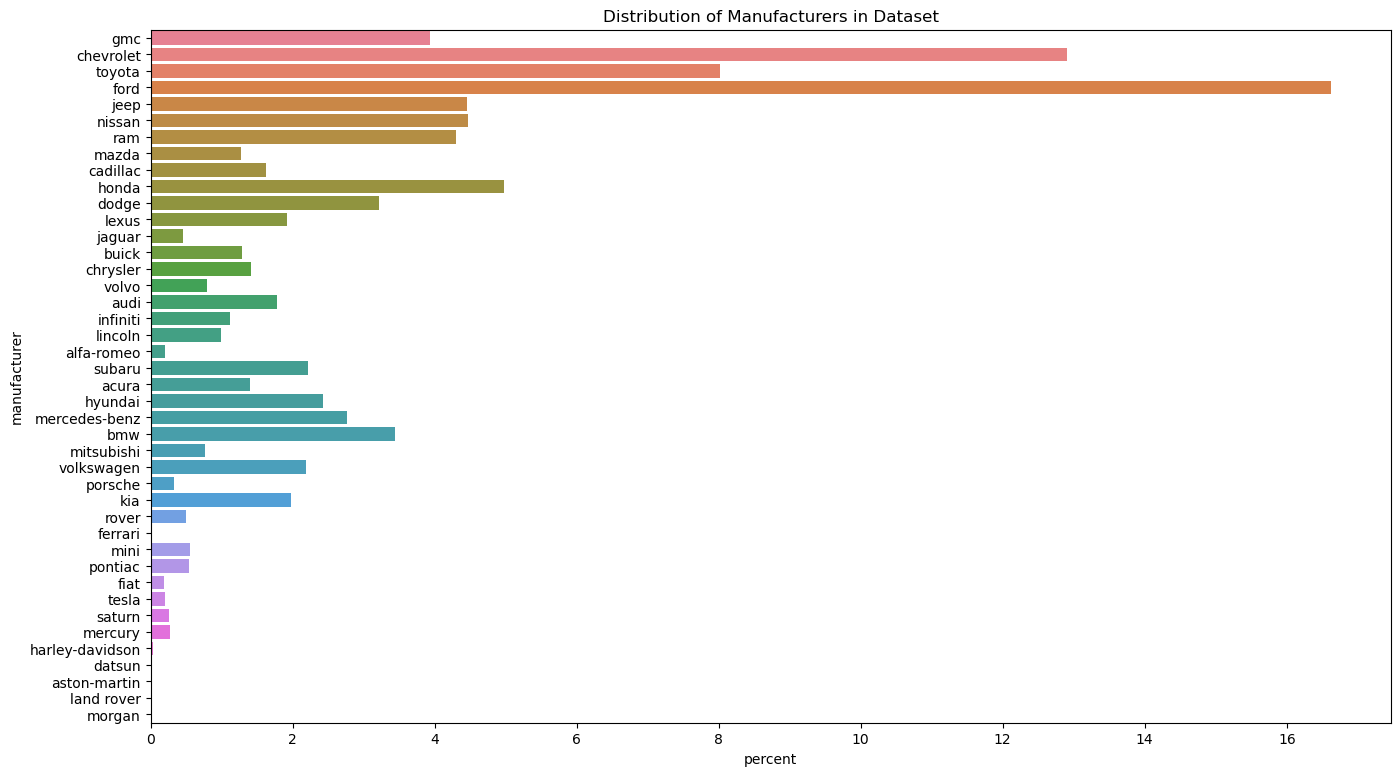

In [729]:
#Visualize distribution of manufacturers in dataset
plt.figure(figsize=(16,9))
sns.countplot(df_vehicles, y='manufacturer', hue='manufacturer', stat='percent', 
              legend=False).set_title('Distribution of Manufacturers in Dataset')

plt.show()